Data hosted from: http://yann.lecun.com/exdb/mnist/

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

Looks like we will have convert the Base64 image to a numpy array of vectors of 28x28 = 784 numbers:

In [3]:
type(mnist.test.images[0])

numpy.ndarray

In [4]:
print(mnist.test.images[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

And the label input by the user will have to be one hot encoded.

In [5]:
import tensorflow as tf

Add placeholder tensor/node of n inputs with indexes of 784 to graph. So any number of MNIST images, each flattened into a 784-dimensional vector, can be put into this placeholder.

In [6]:
x = tf.placeholder(tf.float32, [None, 784])

Add weights and biases as tensorflow Varibles. Intializing the inital values as zeros. Since we are going to learn W and b, it doesn't matter very much what they initially are - according to tensorflow.

Note the dimensions of W, we want to multiply the 784-dimensional image vectors by it to produce 10-dimensional vectors as the evidence for the different classes.

In [7]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Create model.



In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [12]:
sess = tf.InteractiveSession()

In [13]:
tf.global_variables_initializer().run()

In [14]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [15]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9166


In [16]:
saver = tf.train.Saver()
#Now, save the graph
saver.save(sess, 'C:/Users/Tara/Documents/Emerging Technologies/Project/Emerging-Technologies-Assignment/rough_work/my_test_model.ckpt')

'C:/Users/Tara/Documents/Emerging Technologies/Project/Emerging-Technologies-Assignment/rough_work/my_test_model.ckpt'

In [17]:
import numpy as np
digit3 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.01171875, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.0, 0.0, 0.0, 0.01171875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.04296875, 0.42578125, 0.8671875, 0.97265625, 0.8984375, 0.6171875, 0.21875, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.35546875, 0.99609375, 0.83203125, 0.5703125, 0.75, 0.99609375, 0.99609375, 0.6015625, 0.0703125, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.1640625, 0.4765625, 0.0078125, 0.0, 0.0, 0.1328125, 0.6015625, 0.99609375, 0.90234375, 0.234375, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0078125, 0.0, 0.0, 0.265625, 0.89453125, 0.97265625, 0.19140625, 0.00390625, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.00390625, 0.0, 0.0, 0.0078125, 0.015625, 0.0, 0.1171875, 0.9375, 0.71875, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02734375, 0.0, 0.71875, 0.88671875, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01953125, 0.0, 0.12109375, 0.95703125, 0.7265625, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.015625, 0.015625, 0.0, 0.0, 0.1328125, 0.81640625, 0.9921875, 0.234375, 0.00390625, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05859375, 0.51171875, 0.93359375, 0.9296875, 0.2578125, 0.0, 0.015625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.234375, 0.48828125, 0.63671875, 0.9296875, 0.99609375, 0.99609375, 0.828125, 0.46875, 0.21875, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.02734375, 0.5859375, 0.99609375, 0.99609375, 0.99609375, 0.828125, 0.7578125, 0.77734375, 0.8984375, 0.99609375, 0.99609375, 0.7421875, 0.12109375, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.1015625, 0.48046875, 0.4453125, 0.3125, 0.16015625, 0.0, 0.0, 0.0, 0.01953125, 0.13671875, 0.4921875, 0.99609375, 0.8125, 0.01953125, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.4140625, 0.99609375, 0.27734375, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.015625, 0.015625, 0.0078125, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.015625, 0.109375, 0.98828125, 0.4375, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.01171875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.01171875, 0.07421875, 0.98828125, 0.44921875, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.00390625, 0.0, 0.0, 0.0, 0.0078125, 0.0234375, 0.0, 0.3984375, 0.99609375, 0.328125, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.3203125, 0.45703125, 0.015625, 0.0, 0.0, 0.01171875, 0.015625, 0.01171875, 0.0, 0.0, 0.3125, 0.99609375, 0.78125, 0.02734375, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.015625, 0.84375, 0.99609375, 0.83203125, 0.3671875, 0.06640625, 0.0, 0.0, 0.0, 0.10546875, 0.47265625, 0.99609375, 0.83984375, 0.1015625, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.171875, 0.50390625, 0.8984375, 0.99609375, 0.9453125, 0.5390625, 0.39453125, 0.68359375, 0.99609375, 0.99609375, 0.71875, 0.08203125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0390625, 0.33203125, 0.7734375, 0.99609375, 0.99609375, 0.98828125, 0.6484375, 0.2734375, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.015625, 0.0, 0.0, 0.0, 0.13671875, 0.17578125, 0.06640625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.00390625, 0.0, 0.0, 0.0, 0.01171875, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
digit2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0078125, 0.0078125, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.08203125, 0.140625, 0.15625, 0.15625, 0.02734375, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0078125, 0.0, 0.0, 0.25, 0.59765625, 0.84765625, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.90625, 0.36328125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37109375, 0.8359375, 0.99609375, 0.99609375, 0.80859375, 0.53515625, 0.4140625, 0.3515625, 0.43359375, 0.828125, 0.99609375, 0.2578125, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0078125, 0.06640625, 0.5859375, 0.99609375, 0.87109375, 0.43359375, 0.1015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0390625, 0.9296875, 0.75390625, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.2578125, 0.99609375, 0.6171875, 0.015625, 0.0, 0.0, 0.00390625, 0.015625, 0.015625, 0.015625, 0.03125, 0.0, 0.65625, 0.97265625, 0.0234375, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17578125, 0.0, 0.0, 0.015625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.00390625, 0.53125, 0.99609375, 0.05078125, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.53515625, 0.99609375, 0.046875, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.8125, 0.88671875, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.00390625, 0.171875, 0.99609375, 0.4921875, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.66796875, 0.98828125, 0.11328125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.2578125, 0.99609375, 0.5703125, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.08203125, 0.8984375, 0.8828125, 0.0546875, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0078125, 0.734375, 0.99609375, 0.2265625, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.62890625, 0.99609375, 0.41015625, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.03125, 0.6328125, 0.99609375, 0.4765625, 0.0, 0.015625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.1015625, 0.78515625, 0.99609375, 0.48828125, 0.0, 0.0234375, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.01171875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01953125, 0.0, 0.22265625, 0.89453125, 0.98828125, 0.30078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.94921875, 0.921875, 0.42578125, 0.29296875, 0.53515625, 0.6953125, 0.80078125, 0.84375, 0.8984375, 0.90625, 0.90234375, 0.90234375, 0.80859375, 0.484375, 0.25, 0.08203125, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0078125, 0.05078125, 0.3671875, 0.9375, 0.99609375, 0.9921875, 0.99609375, 0.99609375, 0.99609375, 0.92578125, 0.828125, 0.74609375, 0.6953125, 0.65625, 0.66015625, 0.66015625, 0.8671875, 0.99609375, 0.99609375, 0.26171875, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.32421875, 0.99609375, 0.99609375, 0.91796875, 0.7265625, 0.40625, 0.2421875, 0.09765625, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14453125, 0.30859375, 0.0234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.12109375, 0.4765625, 0.36328125, 0.09375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.01171875, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.015625, 0.01171875, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0078125, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.015625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
digit = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.01171875, 0.01171875, 0.015625, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.1875, 0.12890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.0078125, 0.3828125, 0.84765625, 0.99609375, 0.99609375, 0.84375, 0.75, 0.73828125, 0.68359375, 0.49609375, 0.15625, 0.0, 0.0078125, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.18359375, 0.7890625, 0.99609375, 0.84765625, 0.4609375, 0.67578125, 0.8203125, 0.83203125, 0.83984375, 0.921875, 0.99609375, 0.9921875, 0.40234375, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.234375, 0.94921875, 0.96484375, 0.40234375, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.26953125, 0.796875, 0.99609375, 0.6640625, 0.08203125, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.29296875, 0.99609375, 0.87890625, 0.1484375, 0.0, 0.00390625, 0.015625, 0.0078125, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.48828125, 0.99609375, 0.9375, 0.33984375, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.109375, 0.9609375, 0.87890625, 0.12109375, 0.0, 0.01953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.00390625, 0.0, 0.234375, 0.82421875, 0.99609375, 0.40625, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.6484375, 0.99609375, 0.17578125, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.03515625, 0.74609375, 0.99609375, 0.28125, 0.0, 0.01171875, 0.0, 0.0, 0.0078125, 0.0, 0.09375, 0.99609375, 0.62890625, 0.0, 0.01953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.05078125, 0.87109375, 0.8671875, 0.01171875, 0.00390625, 0.00390625, 0.0, 0.01171875, 0.0, 0.20703125, 0.99609375, 0.3046875, 0.00390625, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01953125, 0.0, 0.40625, 0.99609375, 0.24609375, 0.0, 0.01171875, 0.0, 0.01171875, 0.0, 0.19140625, 0.99609375, 0.29296875, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.10546875, 0.9921875, 0.4765625, 0.0, 0.015625, 0.0, 0.01171875, 0.0, 0.1953125, 0.99609375, 0.3515625, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.06640625, 0.99609375, 0.4765625, 0.0, 0.015625, 0.0, 0.00390625, 0.0, 0.078125, 0.9921875, 0.57421875, 0.00390625, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.1015625, 0.9921875, 0.4609375, 0.0, 0.015625, 0.0, 0.0, 0.00390625, 0.0, 0.8359375, 0.8515625, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.37890625, 0.99609375, 0.296875, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.45703125, 0.99609375, 0.26953125, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.00390625, 0.0703125, 0.9140625, 0.85546875, 0.02734375, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.078125, 0.875, 0.91015625, 0.08984375, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0078125, 0.0, 0.6875, 0.99609375, 0.21875, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.2109375, 0.99609375, 0.68359375, 0.0, 0.01171875, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.0, 0.0, 0.62890625, 0.99609375, 0.4453125, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.5, 0.99609375, 0.4921875, 0.0, 0.0, 0.0, 0.01171875, 0.015625, 0.015625, 0.015625, 0.01171875, 0.0, 0.0, 0.1328125, 0.65234375, 0.99609375, 0.51171875, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.01171875, 0.00390625, 0.640625, 0.99609375, 0.76953125, 0.2265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546875, 0.55859375, 0.99609375, 0.99609375, 0.5078125, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.44140625, 0.95703125, 0.99609375, 0.8984375, 0.71875, 0.6328125, 0.6328125, 0.6328125, 0.70703125, 0.9609375, 0.99609375, 0.64453125, 0.203125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.078125, 0.47265625, 0.7265625, 0.8984375, 0.921875, 0.921875, 0.921875, 0.90625, 0.6953125, 0.3046875, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.015625, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.01171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
digit1 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.515625, 0.9921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.515625, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.515625, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=np.float32)

In [18]:
feed_dict = {x: [digit]}
classification = y.eval(feed_dict) 
print(classification)

[[  1.64581642e-01   8.90585682e-07   7.47328997e-01   3.47225703e-02
    1.14971016e-07   4.55679558e-02   3.01265032e-07   2.80277345e-06
    7.79458694e-03   1.46497555e-07]]


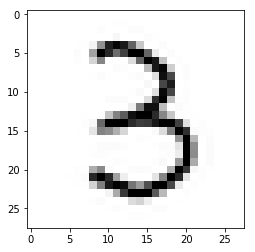

NN predicted 3


In [19]:
from matplotlib import pyplot as plt
from random import randint
#num = randint(0, mnist.test.images.shape[0])
#img = mnist.test.images[num]

classification = sess.run(tf.argmax(y, 1), feed_dict={x: [digit3]})
plt.imshow(digit3.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('NN predicted', classification[0])